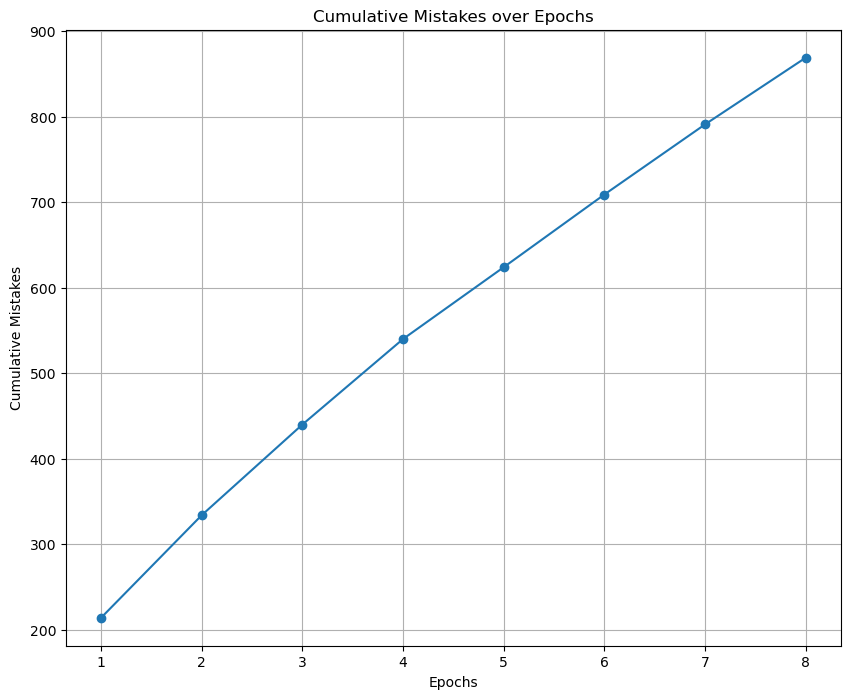

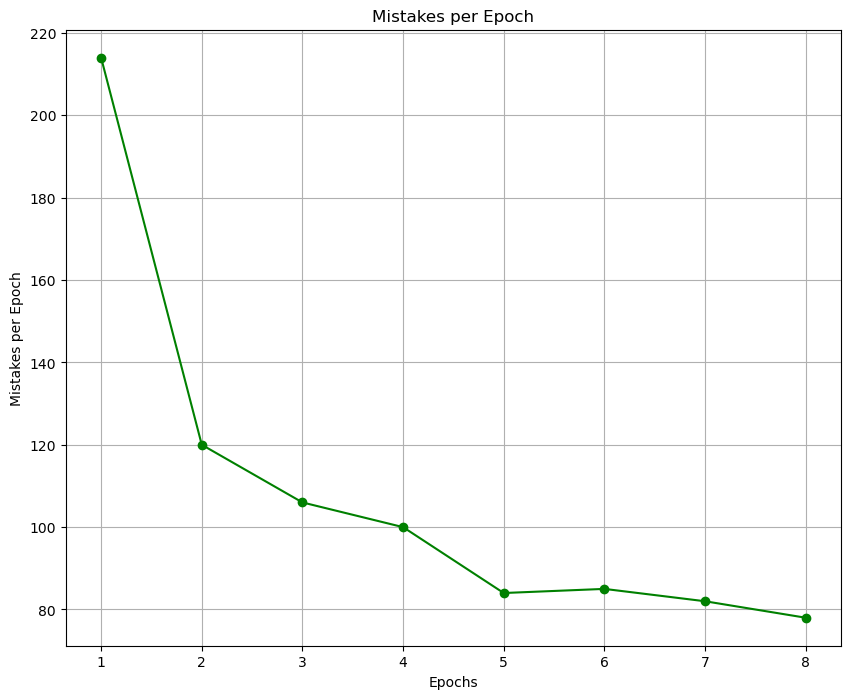

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize

def train_perceptron(X, y, epochs):
    w = np.zeros(X.shape[1])
    cum_mistakes = []  # Cumulative mistakes across all epochs
    mistakes_epoch = []  # Mistakes per individual epoch
    total_mistakes = 0
    
    for e in range(epochs):
        mistakes = 0
        for xi, yi in zip(X, y):
            # Perceptron weight update rule
            if yi * (xi @ w) <= 0:
                w += yi * xi
                total_mistakes += 1
                mistakes += 1
        cum_mistakes.append(total_mistakes)
        mistakes_epoch.append(mistakes)
    
    return w, cum_mistakes, mistakes_epoch

def save_preds(X, w, fname):
    # Generate predictions and save to a file
    preds = np.sign(X @ w)
    np.savetxt(fname, preds, fmt='%d')

def cross_val(X, y, k, epochs):
    kf = KFold(n_splits=k)
    val_errors = []  
    
    for e in range(1, epochs + 1):
        err = []
        for train_idx, test_idx in kf.split(X):
            # Train the perceptron and calculate error on validation set
            w, _, _ = train_perceptron(X[train_idx], y[train_idx], e)
            preds = np.sign(X[test_idx] @ w)
            err.append((preds != y[test_idx]).mean())
        val_errors.append(np.mean(err))
    best_e = np.argmin(val_errors) + 1  # The epoch with the lowest average error
    
    return best_e, val_errors

def add_bias_and_normalize(data):
    # Add a bias term and normalize data to unit norm
    data_with_bias = np.hstack((data, np.ones((data.shape[0], 1))))
    return normalize(data_with_bias, axis=1)

if __name__ == "__main__":
    train_X = add_bias_and_normalize(np.loadtxt('train35.digits'))
    train_y = np.loadtxt('train35.labels', dtype=int)
    test_X = add_bias_and_normalize(np.loadtxt('test35.digits'))

    # Determine the best epoch number using cross-validation
    best_e, _ = cross_val(train_X, train_y, k=5, epochs=20)

    # Train the perceptron model with the optimal number of epochs
    w, cum_mistakes, mistakes_epoch = train_perceptron(train_X, train_y, best_e)

    save_preds(test_X, w, 'test35.predictions')

    # Plot the cumulative number of mistakes across epochs
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, best_e + 1), cum_mistakes, marker='o', linestyle='-')
    plt.xlabel('Epochs')
    plt.ylabel('Cumulative Mistakes')
    plt.title('Cumulative Mistakes over Epochs')
    plt.grid(True)
    plt.show()

    # Plot the number of mistakes made in each epoch
    plt.figure(figsize=(10, 8))
    plt.plot(range(1, best_e + 1), mistakes_epoch, marker='o', linestyle='-', color='green')
    plt.xlabel('Epochs')
    plt.ylabel('Mistakes per Epoch')
    plt.title('Mistakes per Epoch')
    plt.grid(True)
    plt.show()